# Recommendation Systems - IBCF - Euclidean
I used the Euclidean distance here as cosine is not giving proper results. Also, I normalized the rating data as there are huge concentration of ratings above 6. Euclidean distance with normalized ratings gave some better results. And I only considered ratings above 6 as they would give better reason to recommend that product.

I should normalize the ratings in order to bring them within the range of 0 to 1 that makes the similarity score calculation accurate.

In [1]:
#IBCF
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('book.csv', encoding='iso-8859-1')
data = data.sort_values(by ='User.ID').reset_index(drop = True)
data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,2402,8,Wings,5
1,2401,8,The Western way: A practical guide to the West...,5
2,2400,8,Ancient Celtic Romances,5
3,2403,8,Truckers,5
4,2406,8,The Art Of Celtia,7
...,...,...,...,...
9995,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
9996,2399,278854,Celtic Mythology (Library of the World's Myths...,8
9997,2394,278854,A corrente de Trewis Scott,7
9998,2395,278854,As valkÃ­rias,7


In [3]:
#data = data.iloc[:, 1:]
data.columns = ['index', 'user_id', 'book_title', 'book_rating']

In [4]:
data_dups = data[['user_id', 'book_title']].value_counts().reset_index(name='count')

In [5]:
data_dups

,user_id,book_title,count
0,3757,The Magician's Tale,2
1,278418,White Oleander : A Novel,2
2,162052,Rose,2
3,2276,In the Beauty of the Lilies,2
4,2033,The First Time,2
...,...,...,...
9988,2632,7b,1
9989,2632,"Fair Trial (Harlequin Romance, No 3110)",1
9990,2633,"Unfriendly Proposition (Harlequin Romance, No ...",1
9991,2634,SILVER LININGS : SILVER LININGS,1


In [6]:
data2 = data_dups[data_dups['count'] == 1]

In [7]:
data_new = pd.merge(data, data2)

In [8]:
data_new

,index,user_id,book_title,book_rating,count
0,2402,8,Wings,5,1
1,2401,8,The Western way: A practical guide to the West...,5,1
2,2400,8,Ancient Celtic Romances,5,1
3,2403,8,Truckers,5,1
4,2406,8,The Art Of Celtia,7,1
...,...,...,...,...,...
9981,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7,1
9982,2399,278854,Celtic Mythology (Library of the World's Myths...,8,1
9983,2394,278854,A corrente de Trewis Scott,7,1
9984,2395,278854,As valkÃ­rias,7,1


In [9]:
data_new = data_new[data_new['book_rating'] > 6]

In [10]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_new[['book_rating']] = mm.fit_transform(data_new[['book_rating']])

C:\Users\harivars\AppData\Local\Temp\ipykernel_20192\769894339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[['book_rating']] = mm.fit_transform(data_new[['book_rating']])


In [11]:
data_new

,index,user_id,book_title,book_rating,count
4,2406,8,The Art Of Celtia,0.000000,1
9,2409,12,Apocalypse Wow,1.000000,1
13,2413,16,Random Acts Of Management:A Dilbert Book,0.666667,1
14,2414,17,Conversations With Dogbert: A Dilbert Book,0.000000,1
18,2418,19,The Murder Book,0.000000,1
...,...,...,...,...,...
9980,2397,278854,Blast From the Past,0.000000,1
9981,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),0.000000,1
9982,2399,278854,Celtic Mythology (Library of the World's Myths...,0.333333,1
9983,2394,278854,A corrente de Trewis Scott,0.000000,1


In [12]:
len(data_new.user_id.unique())

1812

In [13]:
len(data_new.book_title.unique())

7390

In [14]:
user_books_df = data_new.pivot(index='book_title',
                                 columns='user_id',
                                 values='book_rating').reset_index(drop=True)

In [15]:
user_books_df

user_id,8,12,16,17,19,22,26,32,39,42,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Impute those NaNs with 0 values
user_books_df.fillna(0, inplace=True)

In [17]:
user_books_df

user_id,8,12,16,17,19,22,26,32,39,42,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Getting the similarities

In [18]:
## Getting the similaritiesfrom sklearn.metrics import pairwise_distances
# from sklearn.metrics.pairwise import cosine_similarity
# from scipy.spatial.distance import cdist

In [19]:
user_sim = 1 - pairwise_distances( (user_books_df).values,metric='euclidean')

In [20]:
user_sim

array([[1.        , 0.66666667, 0.52859548, ..., 0.52859548, 0.25464401,
        0.66666667],
       [0.66666667, 1.        , 0.66666667, ..., 0.66666667, 0.33333333,
        1.        ],
       [0.52859548, 0.66666667, 1.        , ..., 0.52859548, 0.25464401,
        0.66666667],
       ...,
       [0.52859548, 0.66666667, 0.52859548, ..., 1.        , 0.25464401,
        0.66666667],
       [0.25464401, 0.33333333, 0.25464401, ..., 0.25464401, 1.        ,
        0.33333333],
       [0.66666667, 1.        , 0.66666667, ..., 0.66666667, 0.33333333,
        1.        ]])

In [21]:
user_sim_df = pd.DataFrame(user_sim)

In [22]:
user_sim_df.shape

(7390, 7390)

In [23]:
user_sim_df.index = data_new.book_title.unique()
user_sim_df.columns = data_new.book_title.unique()

In [24]:
user_sim_df

,The Art Of Celtia,Apocalypse Wow,Random Acts Of Management:A Dilbert Book,Conversations With Dogbert: A Dilbert Book,The Murder Book,Shock-Trauma,The Jester,Jupiter's Bones: A Novel (Peter Decker &amp; Rina Lazarus Novels (Hardcover)),Silent Witness: How Forensic Anthropology Is Used to Solve the World's Toughest Crimes,No Witnesses: A Novel,...,iI Paradiso Degli Orchi,Pay It Forward: A Novel,Hitched,Paradise Wild,Bola da vez: Romance policial (ColeÃ§Ã£o Romance policial brasileiro),Blast From the Past,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),Celtic Mythology (Library of the World's Myths and Legends),A corrente de Trewis Scott,As valkÃ­rias
The Art Of Celtia,1.000000,0.666667,0.528595,0.666667,-0.054093,-0.054093,0.666667,-0.054093,-0.054093,0.254644,...,0.528595,0.254644,0.528595,0.254644,-0.054093,0.666667,0.528595,0.528595,0.254644,0.666667
Apocalypse Wow,0.666667,1.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333,...,0.666667,0.333333,0.666667,0.333333,0.000000,1.000000,0.666667,0.666667,0.333333,1.000000
Random Acts Of Management:A Dilbert Book,0.528595,0.666667,1.000000,0.666667,-0.054093,-0.054093,0.666667,-0.054093,-0.054093,0.254644,...,0.528595,0.254644,0.528595,0.254644,-0.054093,0.666667,0.528595,0.528595,0.254644,0.666667
Conversations With Dogbert: A Dilbert Book,0.666667,1.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333,...,0.666667,0.333333,0.666667,0.333333,0.000000,1.000000,0.666667,0.666667,0.333333,1.000000
The Murder Book,-0.054093,0.000000,-0.054093,0.000000,1.000000,-0.414214,0.000000,-0.414214,-0.414214,-0.201850,...,-0.054093,-0.201850,-0.054093,-0.201850,-0.414214,0.000000,-0.054093,-0.054093,-0.201850,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Blast From the Past,0.666667,1.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333,...,0.666667,0.333333,0.666667,0.333333,0.000000,1.000000,0.666667,0.666667,0.333333,1.000000
La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),0.528595,0.666667,0.528595,0.666667,-0.054093,-0.054093,0.666667,-0.054093,-0.054093,0.254644,...,0.528595,0.254644,0.528595,0.254644,-0.054093,0.666667,1.000000,0.528595,0.254644,0.666667
Celtic Mythology (Library of the World's Myths and Legends),0.528595,0.666667,0.528595,0.666667,-0.054093,-0.054093,0.666667,-0.054093,-0.054093,0.254644,...,0.528595,0.254644,0.528595,0.254644,-0.054093,0.666667,0.528595,1.000000,0.254644,0.666667
A corrente de Trewis Scott,0.254644,0.333333,0.254644,0.333333,-0.201850,-0.201850,0.333333,-0.201850,-0.201850,0.057191,...,0.254644,0.057191,0.254644,0.057191,-0.201850,0.333333,0.254644,0.254644,1.000000,0.333333


In [25]:
user_sim_df.iloc[10:20, 10:20]

,The Hancock Boys,Dead Reckoning: The New Science of Catching Killers,Roadwork,Watermelon,Prey,Reliquary,The Visitor (A Jack Reacher Novel),Haunted Yorkshire,Fear Nothing,Dale Brown's Dreamland
The Hancock Boys,1.000000,0.057191,0.333333,0.057191,0.333333,0.333333,0.057191,0.333333,0.183503,0.333333
Dead Reckoning: The New Science of Catching Killers,0.057191,1.000000,0.333333,0.057191,0.333333,0.333333,0.057191,0.333333,0.183503,0.333333
Roadwork,0.333333,0.333333,1.000000,0.333333,1.000000,1.000000,0.333333,1.000000,0.528595,1.000000
Watermelon,0.057191,0.057191,0.333333,1.000000,0.333333,0.333333,0.057191,0.333333,0.183503,0.333333
Prey,0.333333,0.333333,1.000000,0.333333,1.000000,1.000000,0.333333,1.000000,0.528595,1.000000
Reliquary,0.333333,0.333333,1.000000,0.333333,1.000000,1.000000,0.333333,1.000000,0.528595,1.000000
The Visitor (A Jack Reacher Novel),0.057191,0.057191,0.333333,0.057191,0.333333,0.333333,1.000000,0.333333,0.183503,0.333333
Haunted Yorkshire,0.333333,0.333333,1.000000,0.333333,1.000000,1.000000,0.333333,1.000000,0.528595,1.000000
Fear Nothing,0.183503,0.183503,0.528595,0.183503,0.528595,0.528595,0.183503,0.528595,1.000000,0.528595
Dale Brown's Dreamland,0.333333,0.333333,1.000000,0.333333,1.000000,1.000000,0.333333,1.000000,0.528595,1.000000


In [29]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:10, 0:10]

,The Art Of Celtia,Apocalypse Wow,Random Acts Of Management:A Dilbert Book,Conversations With Dogbert: A Dilbert Book,The Murder Book,Shock-Trauma,The Jester,Jupiter's Bones: A Novel (Peter Decker &amp; Rina Lazarus Novels (Hardcover)),Silent Witness: How Forensic Anthropology Is Used to Solve the World's Toughest Crimes,No Witnesses: A Novel
The Art Of Celtia,0.000000,0.666667,0.528595,0.666667,-0.054093,-0.054093,0.666667,-0.054093,-0.054093,0.254644
Apocalypse Wow,0.666667,0.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333
Random Acts Of Management:A Dilbert Book,0.528595,0.666667,0.000000,0.666667,-0.054093,-0.054093,0.666667,-0.054093,-0.054093,0.254644
Conversations With Dogbert: A Dilbert Book,0.666667,1.000000,0.666667,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333
The Murder Book,-0.054093,0.000000,-0.054093,0.000000,0.000000,-0.414214,0.000000,-0.414214,-0.414214,-0.201850
Shock-Trauma,-0.054093,0.000000,-0.054093,0.000000,-0.414214,0.000000,0.000000,-0.414214,-0.414214,-0.201850
The Jester,0.666667,1.000000,0.666667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
Jupiter's Bones: A Novel (Peter Decker &amp; Rina Lazarus Novels (Hardcover)),-0.054093,0.000000,-0.054093,0.000000,-0.414214,-0.414214,0.000000,0.000000,-0.414214,-0.201850
Silent Witness: How Forensic Anthropology Is Used to Solve the World's Toughest Crimes,-0.054093,0.000000,-0.054093,0.000000,-0.414214,-0.414214,0.000000,-0.414214,0.000000,-0.201850
No Witnesses: A Novel,0.254644,0.333333,0.254644,0.333333,-0.201850,-0.201850,0.333333,-0.201850,-0.201850,0.000000


In [27]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:20]

The Art Of Celtia                                                                                                            Apocalypse Wow
Apocalypse Wow                                                                                   Conversations With Dogbert: A Dilbert Book
Random Acts Of Management:A Dilbert Book                                                                                     Apocalypse Wow
Conversations With Dogbert: A Dilbert Book                                                                                   Apocalypse Wow
The Murder Book                                                                                                    The Dante Club : A Novel
Shock-Trauma                                                                                           The Disappearance of Sherlock Holmes
The Jester                                                                                                                   Apocalypse Wow
Jupiter's Bones: A N

<Axes: >

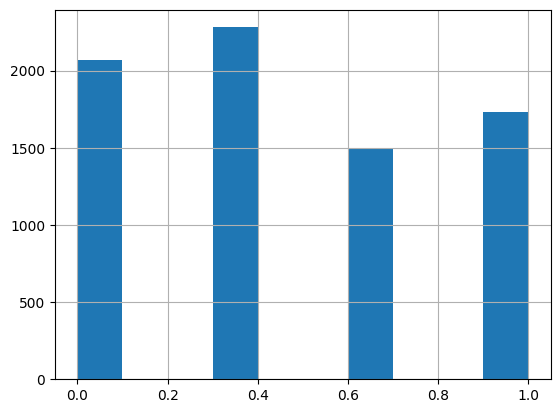

In [28]:
data_new.book_rating.hist()

From the above results we can conclude that:

The 'The Art of Celtia' and the 'Apocalypse WoW' can recommended together as they have higher score. Also 'Conversations With Dogbert: A Dilbert Book' book can also be recommended with these two.